Анализ данных

Мы проводим анализ данных на предмет целостности и полноты данных, оцениваем выбросы и аномалии нашего датасета

In [35]:
# Загрузка нужных библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка данных

Выгружаем данные и выводим первые 5 строк

In [36]:
FILE_ID = "1QFRLAvsex4Q3-g4SutvEHG2AA2lTYfv8"
URL = f"https://drive.google.com/uc?id={FILE_ID}"
raw_data = pd.read_csv(URL ,sep=';', encoding='utf-8-sig')

# Просмотр первых строк
print("Первые 5 строк данных:")
print(raw_data.head(5))

Первые 5 строк данных:
   Number      ID Chemical compound               Name of compound  \
0    5903  192631       Na1.44Ge136  Sodium germanium (1.44/136).    
1    8210  423734            Ba2Ni3        Dibarium trinickelide.    
2    4441  106482              CoMg       Cobalt magnesium (1/1).    
3    1292   58646              BaCu          Barium copper (1/1).    
4    7530  247133              SrCu       Strontium copper (1/1).    

                                             Authors  \
0  Boehme Bodo,Reibold Marianne,Auffermann Gudrun...   
1  Hoehn P.,Burkhardt U.,Hoffmann S.,Jach F.,Knie...   
2          Yoshida M.,Bonhomme F.,Yvon K.,Fischer P.   
3                    Fornasini Maria L.,Merlo Franco   
4                            Merlo F.,Fornasini M.L.   

                                          Literature Symmetry Type  \
0  Zeitschrift fuer Kristallographie - Crystallin...    Fd-3m   3D   
1  Zeitschrift fuer Anorganische und Allgemeine C...    P-3m1   3D   
2        

Проверка данных на пропуски и счет процента пропусков

In [37]:
print(raw_data.isnull().sum()) # проверка пропусков

print("\nПроцент пропусков") # Процент пропусков по столбцам после обработки
print(raw_data.isnull().mean() * 100)

Number                  0
ID                      0
Chemical compound       0
Name of compound        0
Authors                 0
Literature              0
Symmetry                0
Type                    0
Topology                0
G3                      0
Number of atoms         0
Unnamed: 11          7444
Unnamed: 12          7444
Unnamed: 13          7444
Unnamed: 14          7222
dtype: int64

Процент пропусков
Number                 0.000000
ID                     0.000000
Chemical compound      0.000000
Name of compound       0.000000
Authors                0.000000
Literature             0.000000
Symmetry               0.000000
Type                   0.000000
Topology               0.000000
G3                     0.000000
Number of atoms        0.000000
Unnamed: 11          100.000000
Unnamed: 12          100.000000
Unnamed: 13          100.000000
Unnamed: 14           97.017732
dtype: float64


График Completness, нужное значение минимум 0,98 включительно

C:\Users\user\AppData\Local\Temp\ipykernel_2016\1376026445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


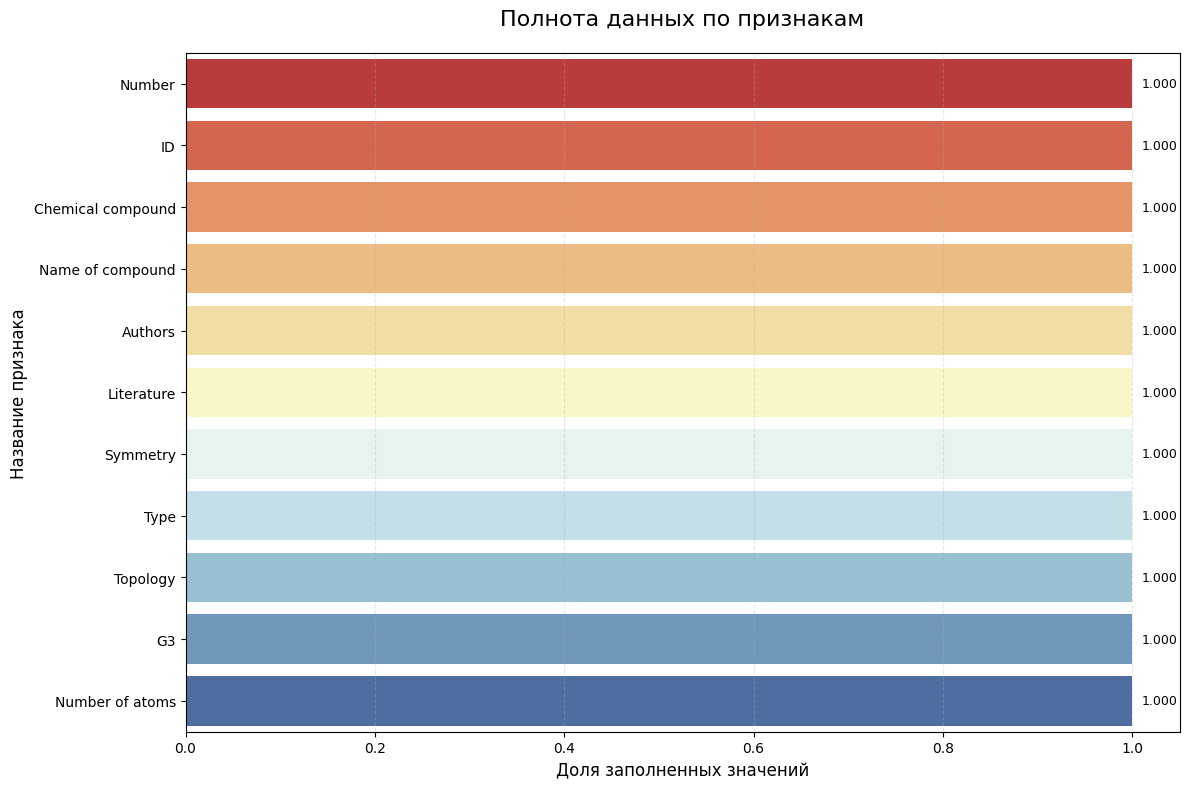

СРЕДНЯЯ ПОЛНОТА ДАННЫХ: 1.000
ЛУЧШИЕ ПРИЗНАКИ (полнота = 1.000):
    Number
    ID
    Chemical compound
    Name of compound
    Authors
    Literature
    Symmetry
    Type
    Topology
    G3
    Number of atoms

Данные, где присутствуют пропуски:


In [38]:
df = pd.read_csv('dataset.csv', delimiter=';', encoding='utf-8')
completeness = (1 - df.isnull().mean()).sort_values()
completeness_df = completeness.reset_index()
completeness_df.columns = ['Признак', 'Полнота']
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=completeness_df,
    x='Полнота', 
    y='Признак',
    palette='RdYlBu'
)
plt.title('Полнота данных по признакам', fontsize=16, pad=20)
plt.xlabel('Доля заполненных значений', fontsize=12)
plt.ylabel('Название признака', fontsize=12)
for i, (index, row) in enumerate(completeness_df.iterrows()):
    ax.text(row['Полнота'] + 0.01, i, f'{row["Полнота"]:.3f}', 
            va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
avg_completeness = completeness.mean()
print(f" Среднее значение полноты данных: {avg_completeness:.3f}")
print(f" Лучшие признаки (полнота = 1.000):")
for col in completeness[completeness == 1.0].index:
    print(f"   ✓ {col}")

print(f"\n Признаки с пропусками:")
for col, comp in completeness[completeness < 1.0].items():
    print(f"   ⚠ {col}: {comp:.3f}")


Анализ показал, что наши данные полные на все 100%. Эталонное значение 0.98 соблюдается.

Далее проводится анализ на уникальность наших данных.

In [39]:
duplicate_count = df.duplicated().sum()
total_rows = len(df)
uniqueness_score = 1 - (duplicate_count / total_rows)

print("Анализ дублей")
print("=" * 25)
print(f"Всего строк: {total_rows}")
print(f"Дубликатов: {duplicate_count}")
print(f"Оценка уникальности: {uniqueness_score:.3f}")

# Дополнительная статистика
print(f"Уникальных строк: {total_rows - duplicate_count}")
print(f"Процент дубликатов: {(duplicate_count/total_rows)*100:.2f}%")

if duplicate_count > 0:
    print(f"\nПримеры дублирующихся строк ({duplicate_count} найдено):")
    duplicates = df[df.duplicated(keep=False)]
    display(duplicates.head())
    
    if duplicate_count > total_rows * 0.1:
        print(" Рекомендация: рекомендуется удалить дубликаты!")
    else:
        print(" Рекомендация: небольшое количество дубликатов")
else:
    print(" Дубликаты не обнаружены!")

# Быстрый анализ по столбцам
print("\n Уникальность по столбцам:")
for col in df.columns:
    unique_pct = df[col].nunique() / total_rows * 100
    print(f"  {col}: {unique_pct:.1f}% уникальных значений")

Анализ дублирующихся значений
Всего строк: 7444
Дубликатов: 0
Оценка уникальности: 1.000
Уникальных строк: 7444
Процент дубликатов: 0.00%
Дубликаты не обнаружены!

Уникальность по столбцам:
  Number: 100.0% уникальных значений
  ID: 100.0% уникальных значений
  Chemical compound: 90.0% уникальных значений
  Name of compound: 92.6% уникальных значений
  Authors: 40.2% уникальных значений
  Literature: 48.0% уникальных значений
  Symmetry: 2.5% уникальных значений
  Type: 0.0% уникальных значений
  Topology: 12.3% уникальных значений
  G3: 58.6% уникальных значений
  Number of atoms: 0.8% уникальных значений


Проверка показала, что полностью уникальны два критерия - ID и Number.Остальные имеют повторяющиесяя значения, но так как датасет имеет химические и кристаллографические данные это нормально. Много соединений имеют схожие топологии (Topology), значений равномерности структуры (G3), симметрии кристаллов (Symmetry) и количество атомов (Number of atoms). Поэтому данные пригодны для дальнейшего анализа.

Теперь проверим долю аномалий в числах

Топ-10 колонок с выбросами:
                 outlier_ratio
Number of atoms       0.065422
Number                0.000000
ID                    0.000000


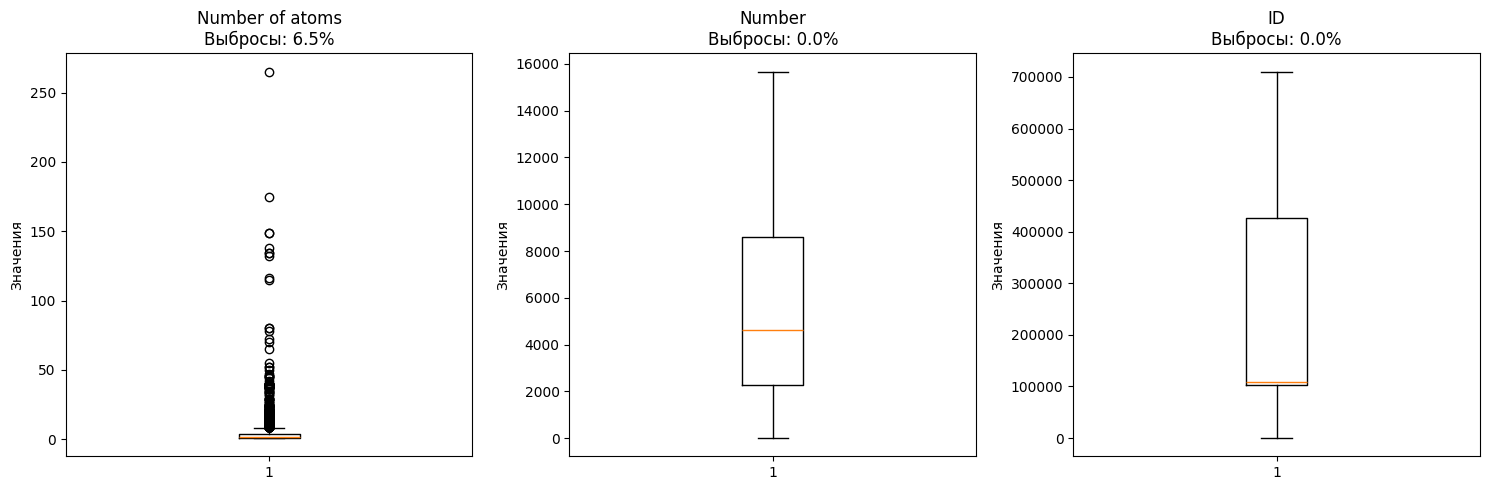

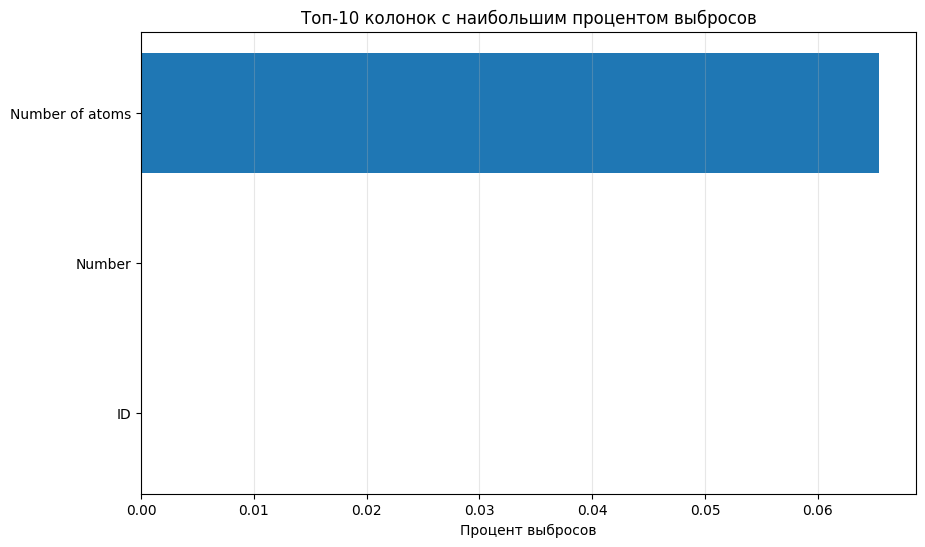

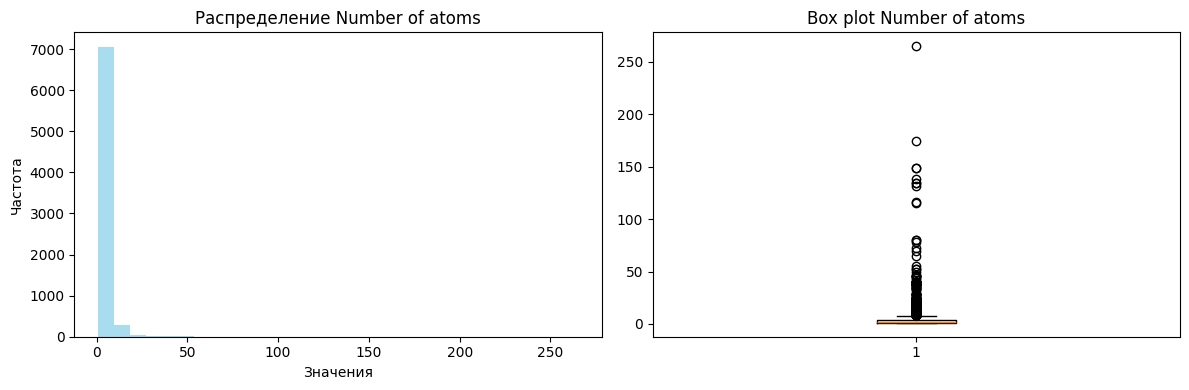

In [ ]:
df = pd.read_csv('dataset.csv', delimiter=';')

# Анализ выбросов
numeric_df = df.select_dtypes(include=[np.number])
outlier_ratio = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = ((numeric_df[col] < lower) | (numeric_df[col] > upper)).sum()
    outlier_ratio[col] = outliers / len(df)

outlier_df = pd.DataFrame.from_dict(outlier_ratio, orient='index', 
                                  columns=['outlier_ratio']).sort_values('outlier_ratio', ascending=False)

print("Топ-10 колонок с выбросами:")
print(outlier_df.head(10))

top_columns = outlier_df.head(3).index

plt.figure(figsize=(15, 5))

for i, col in enumerate(top_columns, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(numeric_df[col].dropna())
    plt.title(f'{col}\nВыбросы: {outlier_df.loc[col, "outlier_ratio"]:.1%}')
    plt.ylabel('Значения')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6)) #Столбчатая диаграмма процента выбросов
top_10 = outlier_df.head(10)
plt.barh(range(len(top_10)), top_10['outlier_ratio'])
plt.yticks(range(len(top_10)), top_10.index)
plt.xlabel('Процент выбросов')
plt.title('Топ-10 колонок с наибольшим процентом выбросов')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.show()

if len(outlier_df) > 0: #Распределение значений для колонки с наибольшими выбросами
    top_col = outlier_df.index[0]
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(numeric_df[top_col].dropna(), bins=30, alpha=0.7, color='skyblue')
    plt.title(f'Распределение {top_col}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(numeric_df[top_col].dropna())
    plt.title(f'Box plot {top_col}')
    
    plt.tight_layout()
    plt.show()


Как видно из графиков больше всего выбросов в колонке количество атомов (Number of atoms) - 0,065, что больше чем эталон 0,02. Они отражают сходства между соединениями.